# Die Confusion-Matrix
### Eine Art der Darstellung zur Beurteilung der Qualität von Classifiern

In [1]:
import pandas as pd

df = pd.read_csv("../classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [2]:
from sklearn.model_selection import train_test_split

X = df[["age", "interest"]].values
y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.88


In [5]:
y_test_pred = model.predict(X_test)

In [6]:
#das wurde vorhergesagt:
y_test_pred

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1.])

In [7]:
#dies sind die tatsächlichen Werte
y_test

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1.])

### Das Format einer `confusion_matrix`:

|                        |Modell: Nicht wahr | Modell: Wahr
| :- | -: | :-: |
**Realität: Nicht wahr** | Richtig negativ   | Falsch positiv
**Realität: Wahr**       | Falsch negativ    | Richtig positiv
    

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[29,  8],
       [ 1, 37]])

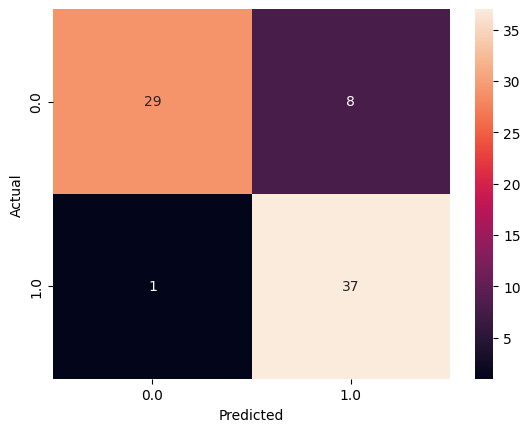

In [9]:
import pandas as pd
# Schöner in Seaborn.....
import seaborn as sn
import matplotlib.pyplot as plt

conf_mat = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True)

plt.show()

In [10]:
print(conf_mat)

Predicted  0.0  1.0
Actual             
0.0         29    8
1.0          1   37
